# Evaluate Simple Linear Regression

## Introduction

In this activity, you will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, you will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.

### Import packages

In [1]:
# Import pandas, pyplot from matplotlib, and seaborn.
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use(['dark_background'])

In [2]:
# Import the statsmodel module.
import statsmodels.api as sm
# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

### Load the dataset

In [3]:
data = pd.read_csv('modified_marketing_and_sales_data.csv')
data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## Data exploration

### Familiarize yourself with the data's features

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, you'll construct a simple linear regression model that predicts sales using a single independent variable. 

**Question:** What are some reasons for conducting an EDA before constructing a simple linear regression model?

Identify the nature of the relationship: EDA helps you understand the relationship between the dependent variable (response) and the independent variable (predictor). By visualizing the data, you can determine whether a linear relationship is appropriate or if other types of relationships exist, such as nonlinear or curvilinear.

Detect outliers: EDA allows you to identify outliers, which are data points that deviate significantly from the overall pattern. Outliers can have a substantial impact on the regression model's fit and can distort the estimated coefficients and their significance. By detecting and understanding outliers, you can make informed decisions about whether to exclude or transform them.

Check for linearity assumptions: EDA helps you assess the assumptions of linear regression, particularly linearity. By examining scatter plots and residual plots, you can evaluate if the relationship between the variables is reasonably linear. If the linearity assumption is violated, you may need to consider alternative regression techniques or apply transformations to the variables.

Explore variable distributions: EDA allows you to examine the distributions of the variables involved in the regression. Understanding the distributions helps you identify potential issues like skewness, outliers, or missing values. Additionally, you can determine if any transformations, such as log transformations or standardizations, are necessary to meet the assumptions of linear regression.

Assess multicollinearity: If you have multiple predictor variables in your regression model, EDA can help you identify multicollinearity, which occurs when two or more independent variables are highly correlated. High multicollinearity can lead to unstable and unreliable coefficient estimates. Through EDA, you can examine correlations among variables and decide if any variables need to be removed or transformed to mitigate multicollinearity.

Gain insights into the data: EDA provides a deeper understanding of the data, its patterns, and its potential complexities. By exploring summary statistics, visualizations, and relationships among variables, you can uncover valuable insights that may guide your model construction, feature engineering, or data preprocessing decisions.

### Explore the data size

In [4]:
data.shape

(4572, 4)

### Explore the independent variables

In [5]:
# Generate descriptive statistics about TV, Radio, and Social_Media.
data[['TV', "Radio", "Social_Media"]].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


### Explore the dependent variable

In [6]:
# Calculate the average missing rate in the sales column.
missing = data['Sales'].isna().sum()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.
pct_na = missing/data['Sales'].count()

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).
print(f"{round(pct_na, 3)}%")

0.001%


**Question:** What do you observe about the percentage of missing values in the `Sales` column?

only 6 missing values out of 4572 datapoints, very little, rather insignificant. Still needs to be removed.

### Remove the missing data

In [7]:
# Subset the data to include rows where Sales is present.
data['Sales'].dropna(inplace=True)

### Visualize the sales distribution

Text(0.5, 1.0, 'Distribution of Sales')

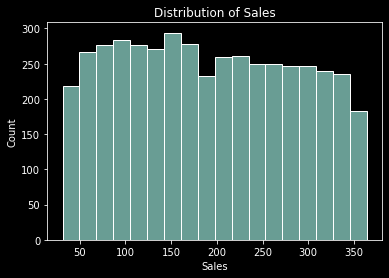

In [8]:
# Create a histogram of the Sales.
sns.histplot(data['Sales'])

# Add a title
plt.title('Distribution of Sales')

**Question:** What do you observe about the distribution of `Sales` from the preceding histogram?

It seems normally distributed.

## Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help you select the X variable for the simple linear regression.

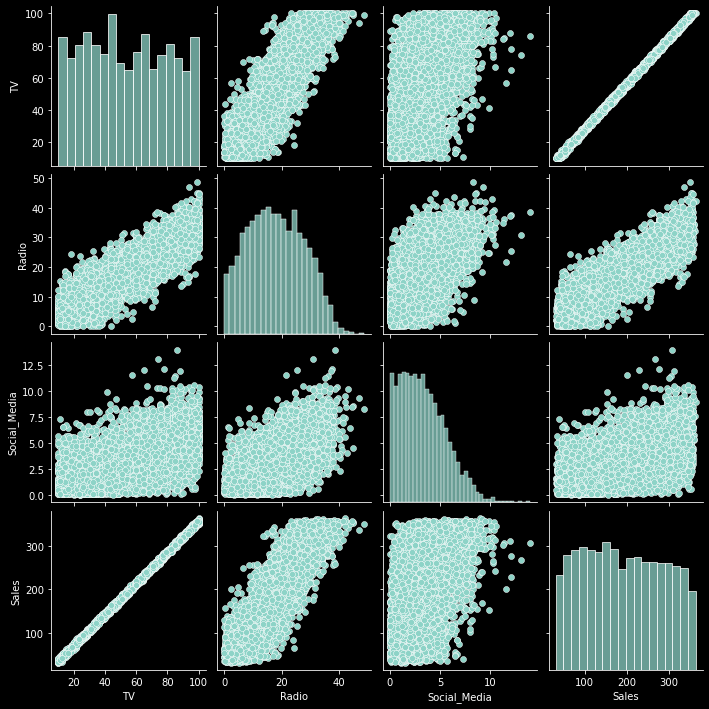

In [9]:
# Create a pairplot of the data.
sns.pairplot(data)

**Question:** Which variable did you select for X? Why?

TV is literally linear, it doesn't get more linear than that.

### Build and fit the model

In [19]:
# Define the OLS formula.
ols_formula = 'Sales ~ TV + Radio + Social_Media'

# Create an OLS model.
OLS = ols(ols_formula, data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
summary = model.summary()

# Display the model results.
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        04:26:22   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303   

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

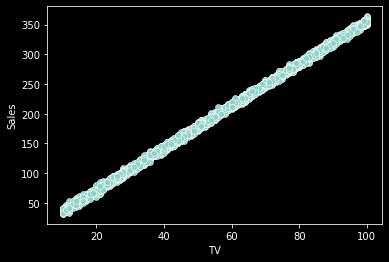

In [11]:
# Create a scatterplot comparing X and Sales (Y).
sns.scatterplot(x='TV', y='Sales', data=data)

**QUESTION:** Is the linearity assumption met?

Obviously, this did not need to be checked as it was visually confirmed to choose the X variable.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

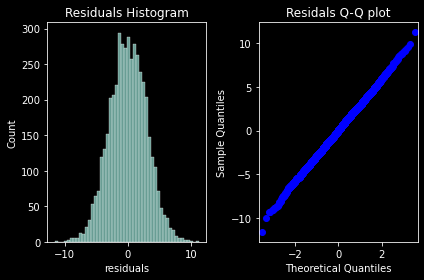

In [13]:
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figures.
fig, axes = plt.subplots(nrows=1, ncols=2)
# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel('residuals')
# Set the title of the residual plot.
axes[0].set_title('Residuals Histogram')
# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, ax=axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title('Residals Q-Q plot')
# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
# Show the plot.
plt.show()

**Question:** Is the normality assumption met?

Residuals are normally distributed.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

<function matplotlib.pyplot.show(*args, **kw)>

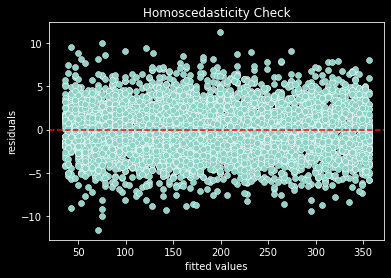

In [15]:
# Create a scatterplot with the fitted values from the model and the residuals.
sns.scatterplot(model.fittedvalues, residuals)

# Set the x-axis label.
plt.xlabel('fitted values')
# Set the y-axis label.
plt.ylabel('residuals')
# Set the title.
plt.title("Homoscedasticity Check")
# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(y=0, color='r', linestyle='--', label='Threshold')

# Show the plot.
plt.show

**QUESTION:** Is the homoscedasticity assumption met?

Yes.

## Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, you can interpret the model results accurately.

In [20]:
# Display the model_results defined previously.
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        04:26:22   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303   

**Question:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?


The independent variables variation account for 99.9% of the variation in the dependent variable.

### Interpret the model results

With the model fit evaluated, assess the coefficient estimates and the uncertainty of these estimates.

**Question:** Based on the preceding model results, what do you observe about the coefficients?

for every additional million dollars of TV promotion, sales could increase  $ 3.5626 million with a 95% confidence level.

**Question:** How would you write the relationship between X and `Sales` in the form of a linear equation?

Sales = -134k + 3.562.600 * TV

**Question:** Why is it important to interpret the beta coefficients?

[Write your response here. Double-click (or enter) to edit.]

### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.

In [21]:
# Display the model_results defined previously.
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        04:26:22   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303   

**Question:** Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

it is statistically significant as we can reject the null hypothesis.

**Question:** Based on this model, what are you interested in exploring?

[Write your response here. Double-click (or enter) to edit.]

**Question:** What recommendations would you make to the leadership at your organization?

[Write your response here. Double-click (or enter) to edit.]

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

Dale, D.,Droettboom, M., Firing, E., Hunter, J. (n.d.). [*Matplotlib.Pyplot.Axline — Matplotlib 3.5.0 Documentation*](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axline.html). 